<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/SeriesDeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as data

In [41]:
apple=data.DataReader("GC=F","yahoo","2000-01-01","2021-01-01").Close
# google=data.DataReader("GOOGL","yahoo","2000-01-01","2021-01-01").Close
# fb=data.DataReader("FB","yahoo","2000-01-01","2021-01-01").Close
# aig=data.DataReader("AIG","yahoo","2000-01-01","2021-01-01").Close
# blg=data.DataReader("BLK","yahoo","2000-01-01","2021-01-01").Close
# fdx=data.DataReader("fdx","yahoo","2000-01-01","2021-01-01").Close
# jnk=data.DataReader("jnj","yahoo","2000-01-01","2021-01-01").Close

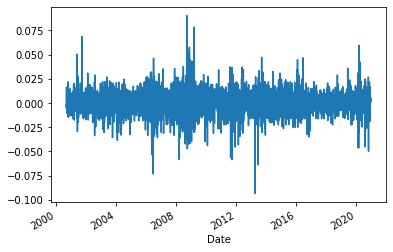

In [42]:
variacion= apple/apple.shift(1) - 1
variacion.plot()

In [43]:
apple.pct_change()

Date
2000-08-30         NaN
2000-08-31    0.016064
2000-09-01   -0.004671
2000-09-05   -0.004332
2000-09-06   -0.005801
                ...   
2020-12-23    0.004339
2020-12-28    0.001334
2020-12-29    0.001332
2020-12-30    0.006012
2020-12-31    0.001111
Name: Close, Length: 5070, dtype: float64

In [44]:
redimiento_diario= (1 + apple.pct_change()).cumprod()

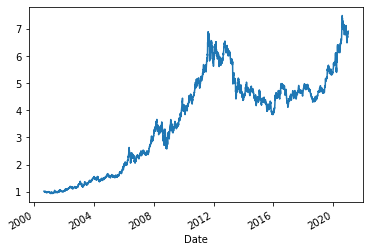

In [45]:
redimiento_diario.plot()

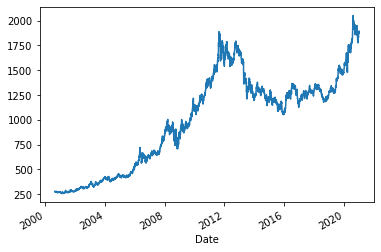

In [46]:
apple.plot()

In [47]:
import statsmodels.api as sm

In [48]:
ciclo_, tend =  sm.tsa.filters.hpfilter(apple)

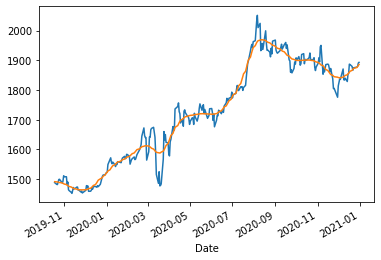

In [49]:
apple[-300:].plot()
tend[-300:].plot()

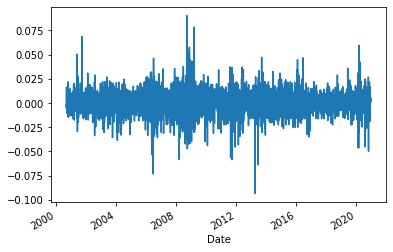

In [50]:
variacion_diaria=apple/apple.shift(1)-1
variacion_diaria.plot()

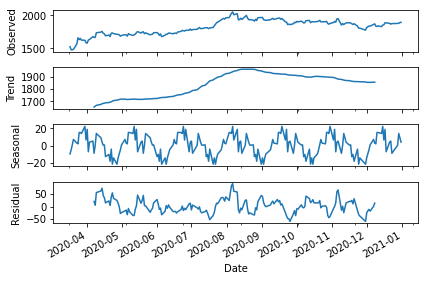

In [55]:
descomposicion= sm.tsa.seasonal_decompose(apple[-200:],freq=30).plot()

In [75]:
modelo_Arima= sm.tsa.ARIMA(apple.iloc[1:],order=(1,0,0))
resultados= modelo_Arima.fit(disp=-1)
pronostico=resultados.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


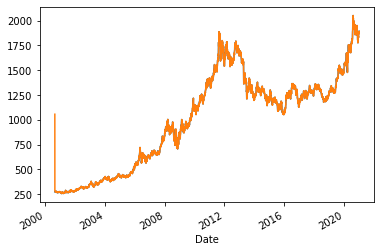

In [76]:
apple.plot()
pronostico.plot()

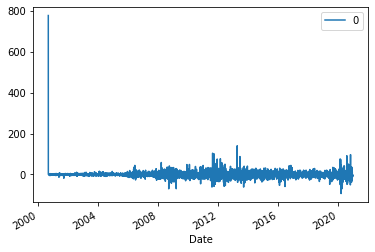

In [77]:
pd.DataFrame(pronostico-apple).plot()

In [79]:
modelo_arima_diario=sm.tsa.ARIMA(variacion_diaria[1:],order=(1,0,0))
resultados_diario= modelo_arima_diario.fit(disp=-1)
pronostico_diario=resultados_diario.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


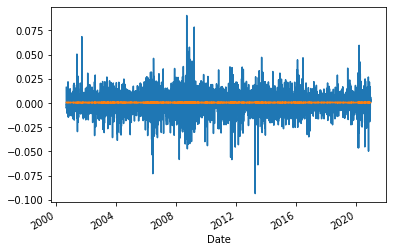

In [81]:
variacion_diaria.plot()
pronostico_diario.plot()